# Manifest

This is the script used to create the Space Fluff project manifest. I had a list of the names of the images, coupled with some physical variables (coordinates and color).

In [2]:
import re
import itertools
import os.path
from os import path
from PIL import Image

In [3]:
filename_list = '/home/anna/Desktop/SUNDIAL/images/aux_data.txt'

In [4]:
def read(path):
    with open(path, 'r', encoding="utf-8") as f:
        return f.read().splitlines()

In [5]:
variable_list = read(filename_list)

I want to add a copy all the images in photo_new into the launch forlder, and put a cross on them, and then write the manifest

In [6]:
image_try = '/home/anna/Desktop/SUNDIAL/images/launch/UDGcand_401_insp.png'

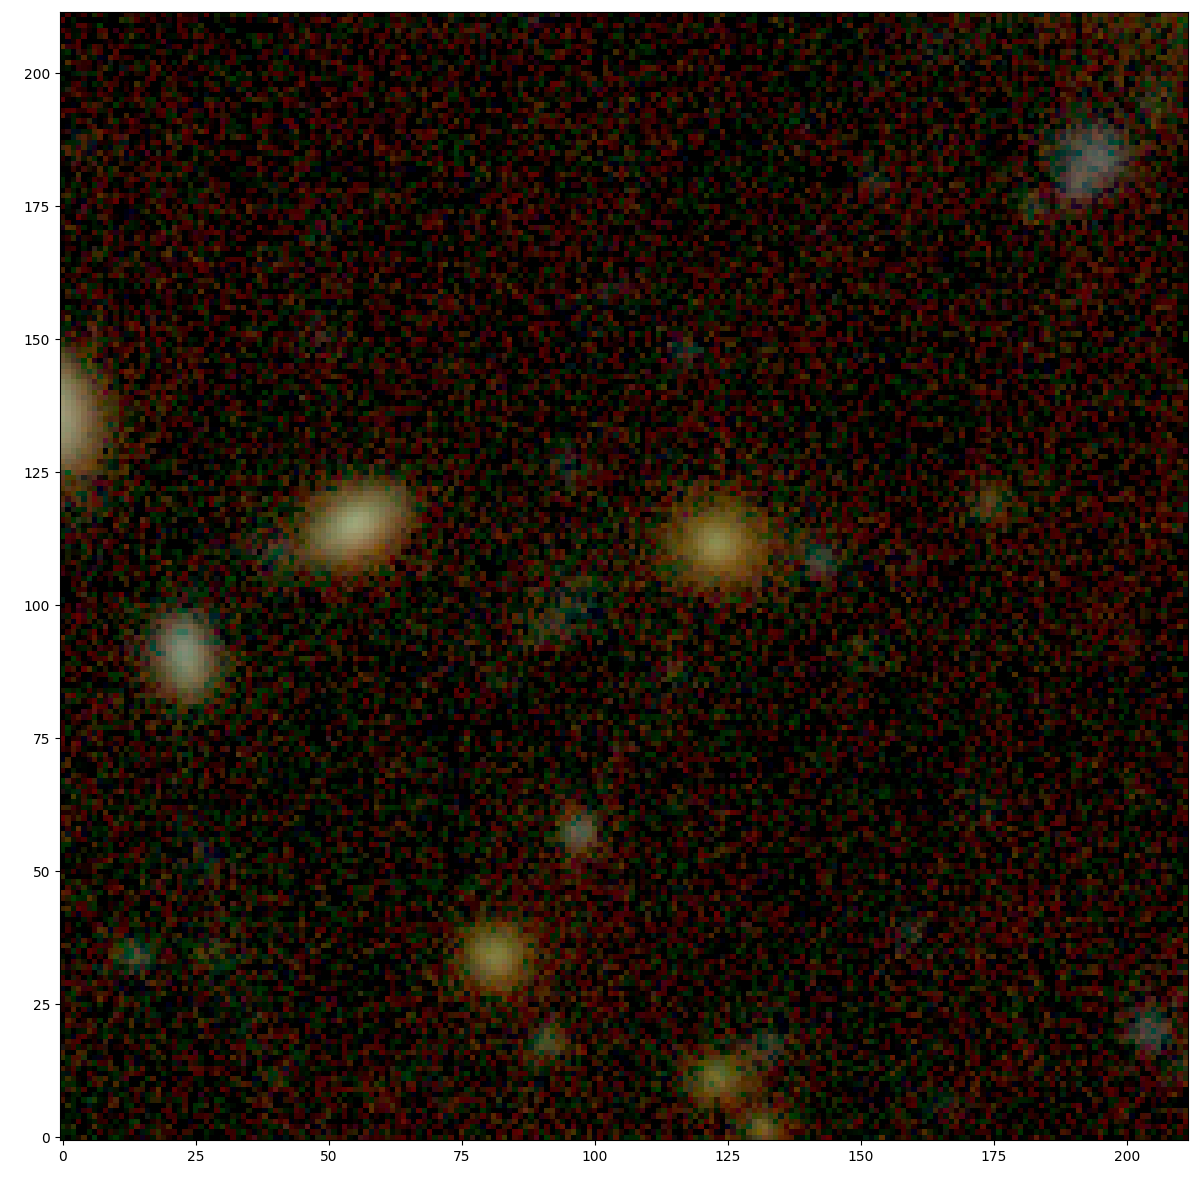

In [7]:
pil_im = Image.open(image_try)
pil_im

In [1]:
from pylab import *

im = array(pil_im)
imshow(im)
plot(im.shape[0]/2,im.shape[1]/2,'x' )
plt.axis('off')
#savefig('/home/anna/Desktop/SUNDIAL/images/try_out.png',bbox_inches = 'tight', dpi=300)

NameError: name 'pil_im' is not defined

We decided to add images with a superimposed cross at the center, following comments from the Beta phase feedback. 

In [ ]:


counter = 0 

for myline in itertools.islice(variable_list, 400, None):
    line = myline.split()
    #print(line)
    x = re.findall('[0-9]+', line[0])
    #print(x)
    if os.path.exists('/home/anna/Desktop/SUNDIAL/images/launch/UDGcand_'+str(x[0])+'_insp.png') is True:
        counter += 1
        im = array(Image.open('/home/anna/Desktop/SUNDIAL/images/launch/UDGcand_'+str(x[0])+'_insp.png'))
        if im is not None:
            imshow(im)
            plot(im.shape[0]/2,im.shape[1]/2,'x' )
            plt.axis('off')
            #savefig('/home/anna/Desktop/SUNDIAL/images/launch/UDGcand_'+str(x[0])+'_insp_cross.png',bbox_inches = 'tight', dpi=300)
            close()
            #print('UDGcand_'+str(x[0])+'_insp.png')
        
print('We have a total of: ', counter, ' missed images')


creating a manifest

In [ ]:
counter = 0 

for myline in itertools.islice(variable_list, 400, None):
    line = myline.split()
    x = re.findall('[0-9]+', line[0])
    if os.path.exists('/home/anna/Desktop/SUNDIAL/images/launch/UDGcand_'+str(x[0])+'_insp.png') is True and os.path.exists('/home/anna/Desktop/SUNDIAL/images/launch/UDGcand_'+str(x[0])+'_insp_cross.png') is True:
        counter += 1
        print(str(x[0]) +','+ line[0] +'_insp.png,'+ line[0] +'_insp_cross.png,' + line[1] +','+ line[2] +','+line[3] +','+line[4], file=open("/home/anna/Desktop/SUNDIAL/images/launch/manifest.csv", "a"))
    else:
        print('something is wrong with: ', 'UDGcand_'+str(x[0])+'_insp.png')
        
print('We have a total of: ', counter, ' images')